In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline

In [2]:
df = pd.read_csv('data/Advertising.csv',index_col= 0)
df.head()
df.columns = ['TV','Radio','Newspaper','Sales']

In [3]:
df.shape

(200, 4)

Text(0, 0.5, 'Sales')

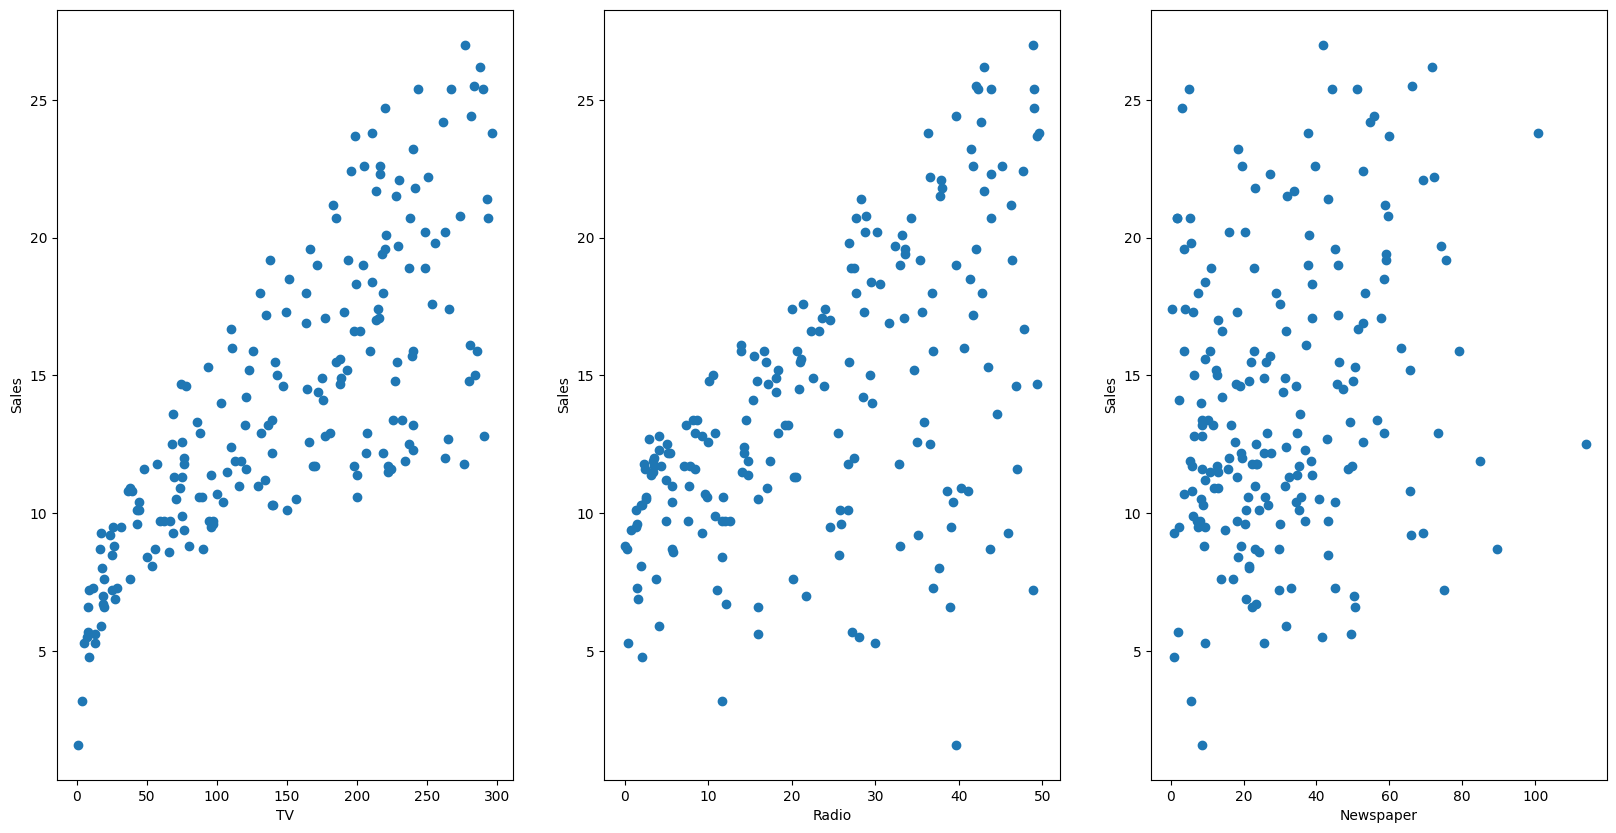

In [4]:
# to figure the relation between Sales and other variables
plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
plt.scatter(df['TV'],df['Sales'])
plt.xlabel('TV')
plt.ylabel('Sales')
##
plt.subplot(1,3,2)
plt.scatter(df['Radio'],df['Sales'])
plt.xlabel('Radio')
plt.ylabel('Sales')
##
plt.subplot(1,3,3)
plt.scatter(df['Newspaper'],df['Sales'])
plt.xlabel('Newspaper')
plt.ylabel('Sales')



In [5]:
# x is the independent variable
# y is the dependent variable
feature_cols=['TV']
x = df[feature_cols]
y = df.Sales
x

,TV
1,230.1
2,44.5
3,17.2
4,151.5
5,180.8
...,...
196,38.2
197,94.2
198,177.0
199,283.6


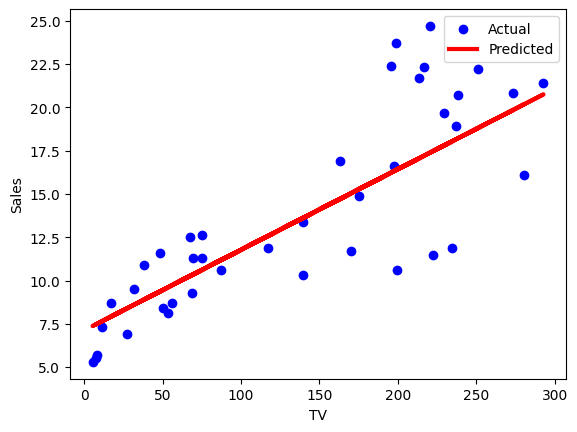

In [6]:
# Create models Linear Regression
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## create a linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Predicted')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [7]:
print(lm.intercept_)
print(lm.coef_)

7.119638430592953
[0.04652973]


In [8]:
X_new = pd.DataFrame({'TV':[50]})
X_new.head()

,TV
0,50


In [9]:
lm.predict(X_new)

array([9.44612512])

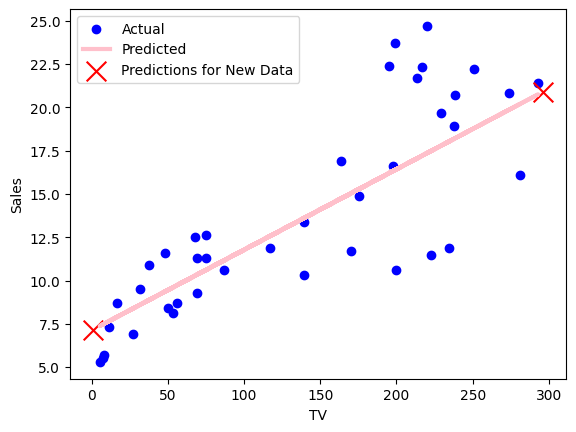

In [10]:
# now let's predict for the smallest and the highest values of x in our frame
# then we use the predicted values to plot the least squares line
min_tv = df['TV'].min()
max_tv = df['TV'].max()

# create DataFrame with these values
new_data = pd.DataFrame({'TV': [min_tv, max_tv]})

#predictions new data
predicted_values = lm.predict(new_data)


plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='pink', linewidth=3, label='Predicted')
plt.scatter(new_data['TV'], predicted_values, color='red', marker='x', s=200, label='Predictions for New Data')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [11]:
# Calculate the predicted values
predicted_values

array([ 7.15220924, 20.9110515 ])

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           1.47e-42
Time:                        22:00:41   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

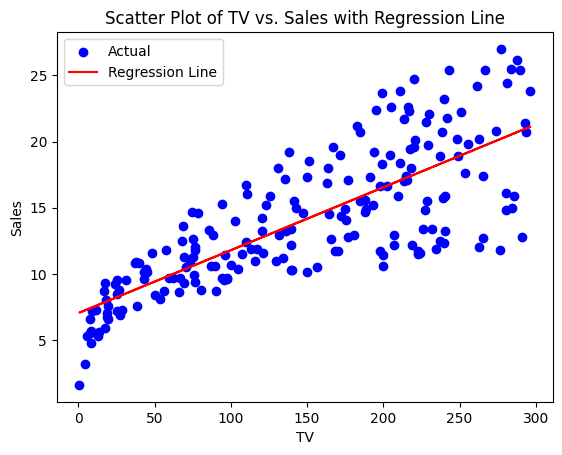

In [12]:
# loking at the plot we can assume that we have a high bias and a low variance model
# hypothesis testing and p values
# when using the null hypothesis is that we assume there is no relationship between tv ads and sales
# we shall reject the null hypothesis if the 95% confidence interval does not include zero
# Using smf from statsmodels to create regression model of Sales v.s TV


model = smf.ols(formula='Sales ~ TV', data=df).fit()
print(model.summary())
# Create and fit a linear regression model using statsmodels
# Plot scatter Plot TV v.s Sales and plot the regression line
X = df[['TV']]
y = df['Sales']
lm.fit(X, y)
y_pred =lm.predict(X)

#scatter plot
plt.scatter(X, y, color='blue', label='Actual')

#regression line
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Scatter Plot of TV vs. Sales with Regression Line')
plt.legend()
plt.show()



In [13]:
# Show p_value
p_value_tv = model.pvalues['TV']
print('"TV" P-value is:',p_value_tv)

"TV" P-value is: 1.467389700194697e-42


In [14]:
# here the p value for TV is far less than 0.05 and hence we infer that there is a relationship between the tv and sales
# the most common way to evaluate the overall fit of a linear model is by using the R squared value
r_squared = model.rsquared
print("R-squared is:", r_squared)

R-squared is: 0.611875050850071


In [15]:
#how can we tell if a good R ?
#the threshold for a good R squared value depends widely on the domain. Therefore,it's most useful as a tool
#for comparing different models.
#'''now let's do a multiple regression model'''
feature_cols=['TV','Radio','Newspaper']
X = df[feature_cols]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#fit model
lm.fit(X_train, y_train)

#intercept and coefficients
print("Intercept:", lm.intercept_)
print("Coefficients:", lm.coef_)


Intercept: 2.979067338122629
Coefficients: [0.04472952 0.18919505 0.00276111]


In [16]:
# Print MSE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:",mse)

MSE: 3.1740973539761033


In [17]:
# Using statsmodels to build multiple regression

X = sm.add_constant(X)
# Create a multiple linear regression model using statsmodels
lm = sm.OLS(y, X).fit()

lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           1.58e-96
Time:                        22:00:41   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
#Tv and Radio have significant P values whereas newspaper does not
# we reject the null hypothesis for TV and radio
#there is no association between these fearures and sales
#we fail to reject the null hypothesis for the variable newspaper
# tv and radios are positivly associated to sales
#newspaper ad spending is slightlu negatively associated with sales
#this ios relevent since we rejected the null hypothesis for the variable newspaper
# the model has a higher R squared value compared to the previous model which means that
#this model provides a better fit to the data than a model that only includes the TV variable

'''feature selection: how do we know what features need to be included in a linear model'''

# your selection here

#add constant to the features matrix for the intercept term
X = sm.add_constant(X)

#fit the model
model = sm.OLS(y, X).fit()

#perform stepwise backward elimination
while model.pvalues.max() > 0.05:
    #remove the variable with the highest p-value
    max_pvalue_index = model.pvalues.idxmax()
    X = X.drop(max_pvalue_index, axis=1)
    model = sm.OLS(y, X).fit()


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           4.83e-98
Time:                        22:00:41   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.0

In [19]:
#let's create a new feature called size
import numpy as np
np.random.seed(12345)
nums=np.random.rand(len(df))
mask_large= nums>0.5
df['Size']='small'
df.loc[mask_large,'Size']='large'
df.head()

,TV,Radio,Newspaper,Sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


In [20]:
#create a dummy variable that represents the categories as a binary value
df['IsLarge']= df.Size.map({'small':0,'large':1})
df.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


In [21]:
# Then do the same multiple regression adding new features

feature_cols = ['TV', 'Radio', 'Newspaper', 'IsLarge']
X = df[feature_cols]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#fitting the model
lm = LinearRegression()
lm.fit(X_train, y_train)

#predictions
y_pred = lm.predict(X_test)


print("Intercept:", lm.intercept_)
print("Coefficients:", lm.coef_)

Intercept: 2.971333729338573
Coefficients: [0.04471731 0.18921661 0.00276374 0.0169283 ]
